In [2]:
import pandas as pd

In [104]:
results = pd.read_csv('/home/shiftpub/AMM-Python/results/dummy_results/newa_results_spread_0.01_dt_0.0003_20241001_164714.csv')

print(results.head())
print(results.columns)

   sigma  fee_rate        pnl       fee  volume  price_distance  dynamic_fee  \
0  0.005    0.0005  21.882957  0.003131   50000       14.140034       0.0005   
1  0.005    0.0005  20.509640  0.002987   50000       13.939647       0.0005   
2  0.005    0.0005  20.365147  0.003032   50000       13.934496       0.0005   
3  0.005    0.0005  19.825057  0.002864   50000       13.862088       0.0005   
4  0.005    0.0005  21.082986  0.003038   50000       14.016962       0.0005   

   total_transactions  
0       626773.903903  
1       601960.505046  
2       605060.535944  
3       576423.497837  
4       606017.807289  
Index(['sigma', 'fee_rate', 'pnl', 'fee', 'volume', 'price_distance',
       'dynamic_fee', 'total_transactions'],
      dtype='object')


Index(['fee_rate', 'mean_fee'], dtype='object')
Index(['fee_rate', 'mean_fee'], dtype='object')
Index(['fee_rate', 'mean_fee'], dtype='object')
Index(['fee_rate', 'mean_fee'], dtype='object')
Index(['fee_rate', 'mean_fee'], dtype='object')
Index(['fee_rate', 'mean_fee'], dtype='object')


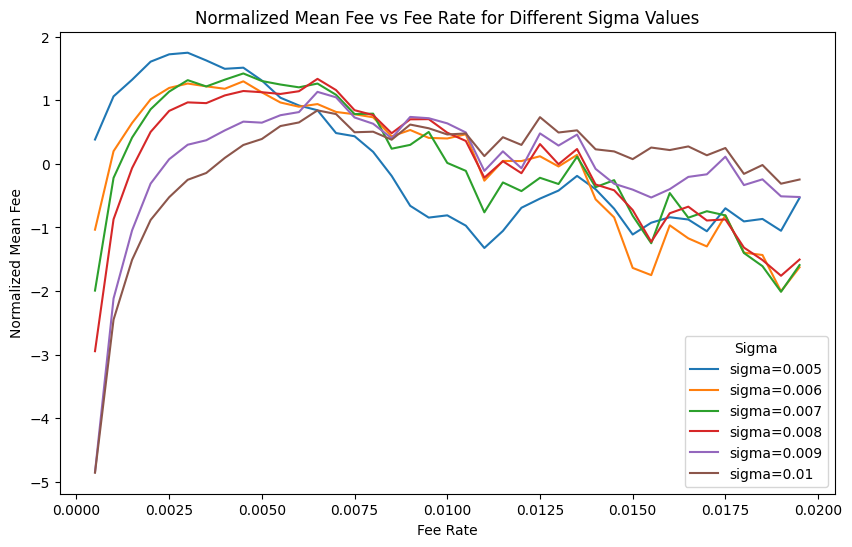

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Get unique sigma values
unique_sigma = results['sigma'].unique()

# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through each sigma and plot the normalized mean_fee line
for sigma in unique_sigma:
    # Filter the data for the current sigma
    df = results[results['sigma'] == sigma]
    
    # Calculate the mean fee for each fee rate
    mean_fee = df.groupby(['fee_rate'])['fee'].mean().reset_index()
    
    # Ensure the 'mean_fee' column exists by renaming it
    mean_fee = mean_fee.rename(columns={'fee': 'mean_fee'})
    
    # Check if the column is correctly created
    print(mean_fee.columns)  # This will help ensure 'mean_fee' exists

    # Normalize the mean_fee using StandardScaler
    scaler = StandardScaler()
    mean_fee['mean_fee_normalized'] = scaler.fit_transform(mean_fee[['mean_fee']])
    
    # Plot the normalized mean fee line for this sigma
    sns.lineplot(x='fee_rate', y='mean_fee_normalized', data=mean_fee, label=f'sigma={sigma}')

# Add labels and title
plt.xlabel('Fee Rate')
plt.ylabel('Normalized Mean Fee')
plt.title('Normalized Mean Fee vs Fee Rate for Different Sigma Values')
plt.legend(title='Sigma')

# Show the plot
plt.show()


<Axes: xlabel='fee_rate', ylabel='fee'>

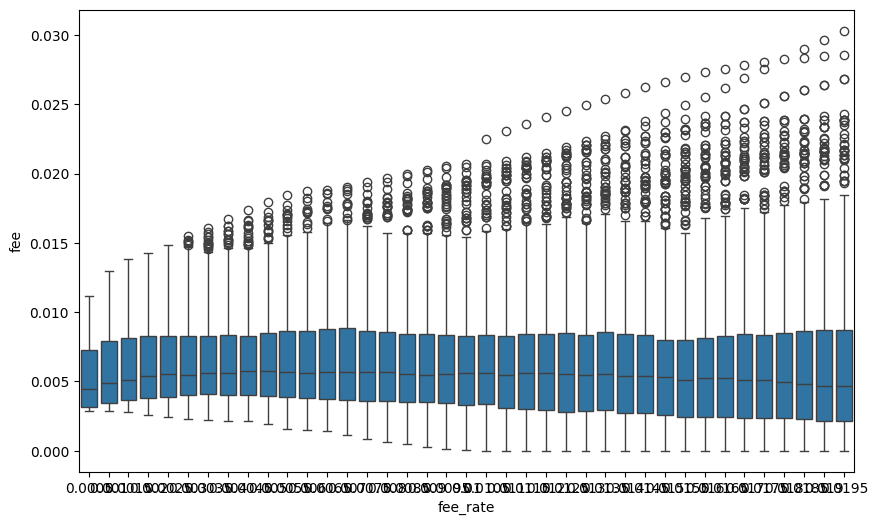

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# sns.boxplot(x='fee_rate', y='fee', hue='sigma', data=results)
sns.boxplot(x='fee_rate', y='fee', data=results)

<Axes: xlabel='fee_rate', ylabel='mean_fee'>

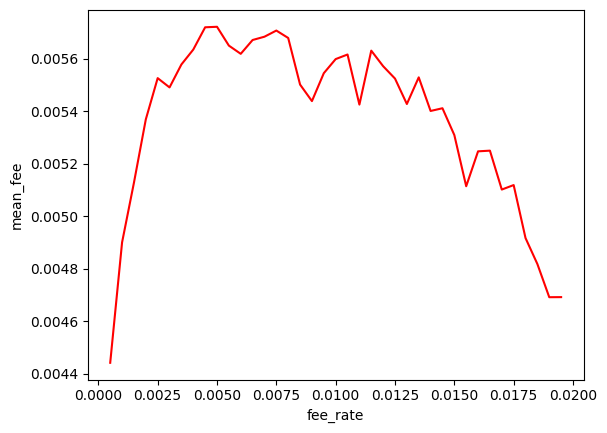

In [71]:
# draw the mean line for each box
mean_fee = results.groupby(['fee_rate'])['fee'].median()
mean_fee = mean_fee.reset_index()
mean_fee = mean_fee.rename(columns={'fee': 'mean_fee'})
sns.lineplot(x='fee_rate', y='mean_fee', data=mean_fee, color='red')


In [68]:
# run a anova test for different fee rates to test whether the mean fee is different
import scipy.stats as stats
fee_rates = results['fee_rate'].unique()
fee_rate_groups = [results[results['fee_rate'] == fee_rate]['fee'] for fee_rate in fee_rates]
f_val, p_val = stats.f_oneway(*fee_rate_groups)
print(f'ANOVA test: f_val={f_val}, p_val={p_val}')


ANOVA test: f_val=2.4870959406053674, p_val=1.048240179778879e-06


     fee_rate1  fee_rate2    t_stat         p_val
0       0.0005     0.0010 -4.717432  2.548415e-06
1       0.0005     0.0015 -6.347628  2.688900e-10
2       0.0005     0.0020 -7.444273  1.437668e-13
3       0.0005     0.0025 -8.012462  1.894569e-15
4       0.0005     0.0030 -8.303577  1.850578e-16
..         ...        ...       ...           ...
736     0.0180     0.0190  0.319293  7.495362e-01
737     0.0180     0.0195  0.127831  8.982950e-01
738     0.0185     0.0190  0.323164  7.466035e-01
739     0.0185     0.0195  0.134153  8.932948e-01
740     0.0190     0.0195 -0.187831  8.510269e-01

[741 rows x 4 columns]


<Axes: xlabel='fee_rate2', ylabel='fee_rate1'>

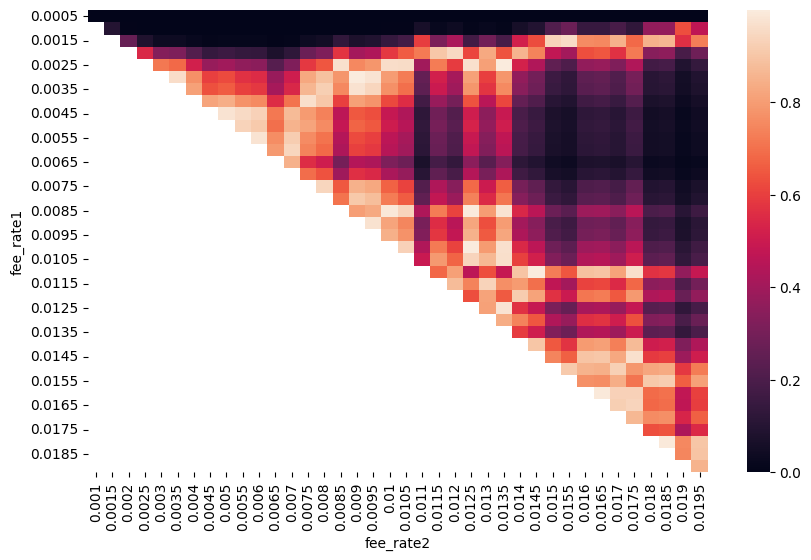

In [93]:
from itertools import combinations
import scipy.stats as stats

# Get unique fee rates
fee_rates = results['fee_rate'].unique()

# Initialize a list to store t-test results
t_test_results = []

# Perform pairwise t-tests
for fee_rate1, fee_rate2 in combinations(fee_rates, 2):
    group1 = results[results['fee_rate'] == fee_rate1]['fee']
    group2 = results[results['fee_rate'] == fee_rate2]['fee']
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances
    t_test_results.append({
        'fee_rate1': fee_rate1,
        'fee_rate2': fee_rate2,
        't_stat': t_stat,
        'p_val': p_val
    })

# Convert results to a DataFrame for better display
t_test_df = pd.DataFrame(t_test_results)
print(t_test_df)

# draw a heat map for the p-values and do not put number on the heat map
plt.figure(figsize=(10, 6))
p_values = t_test_df.pivot(index='fee_rate1', columns='fee_rate2', values='p_val')
sns.heatmap(p_values, annot=False)



q0: 0.002, q50: 0.01, q100: 0.018


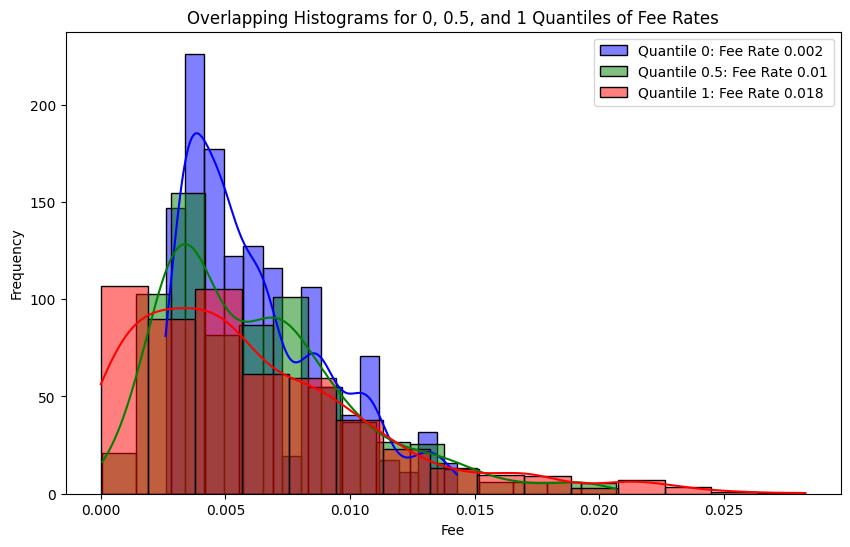

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate quantiles for fee rates
q0 = results['fee_rate'].quantile(0.1)
q50 = results['fee_rate'].quantile(0.5)
q100 = results['fee_rate'].quantile(0.9)

print(f"q0: {q0}, q50: {q50}, q100: {q100}")

# Filter data for each quantile
group_0 = results[results['fee_rate'] == q0]['fee']
group_50 = results[results['fee_rate'] == q50]['fee']
group_100 = results[results['fee_rate'] == q100]['fee']

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(group_0, bins=15, color='blue', label=f'Quantile 0: Fee Rate {q0}', kde=True, stat='density', alpha=0.5)
sns.histplot(group_50, bins=15, color='green', label=f'Quantile 0.5: Fee Rate {q50}', kde=True, stat='density',alpha=0.5)
sns.histplot(group_100, bins=15, color='red', label=f'Quantile 1: Fee Rate {q100}', kde=True, stat='density',alpha=0.5)

# Add labels and legend
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms for 0, 0.5, and 1 Quantiles of Fee Rates')
plt.legend()

# Show plot
plt.show()


In [87]:
from itertools import combinations
import scipy.stats as stats

# Calculate quantiles for fee rates
q0 = results['fee_rate'].quantile(0)
q50 = results['fee_rate'].quantile(0.5)
q100 = results['fee_rate'].quantile(1)

print(f"q0: {q0}, q50: {q50}, q100: {q100}")

# Filter data for each quantile
group_0 = results[results['fee_rate'] == q0]['fee']
group_50 = results[results['fee_rate'] == q50]['fee']
group_100 = results[results['fee_rate'] == q100]['fee']

t_stat, p_val = stats.ttest_ind(group_0, group_50, equal_var=False)  # Assuming unequal variances
print(f"t_test for quantile 0 and 0.5: t_stat={t_stat}, p_val={p_val}")

t_stat, p_val = stats.ttest_ind(group_0, group_100, equal_var=False)  # Assuming unequal variances
print(f"t_test for quantile 0 and 1: t_stat={t_stat}, p_val={p_val}")

t_stat, p_val = stats.ttest_ind(group_50, group_100, equal_var=False)  # Assuming unequal variances
print(f"t_test for quantile 0.5 and 1: t_stat={t_stat}, p_val={p_val}")



q0: 0.0005, q50: 0.01, q100: 0.0195
t_test for quantile 0 and 0.5: t_stat=-6.506010789005773, p_val=1.0157736195266852e-10
t_test for quantile 0 and 1: t_stat=-3.57845344877678, p_val=0.00035718922721806364
t_test for quantile 0.5 and 1: t_stat=1.3841631610501297, p_val=0.1664673374488117


<Axes: xlabel='fee_rate', ylabel='pnl'>

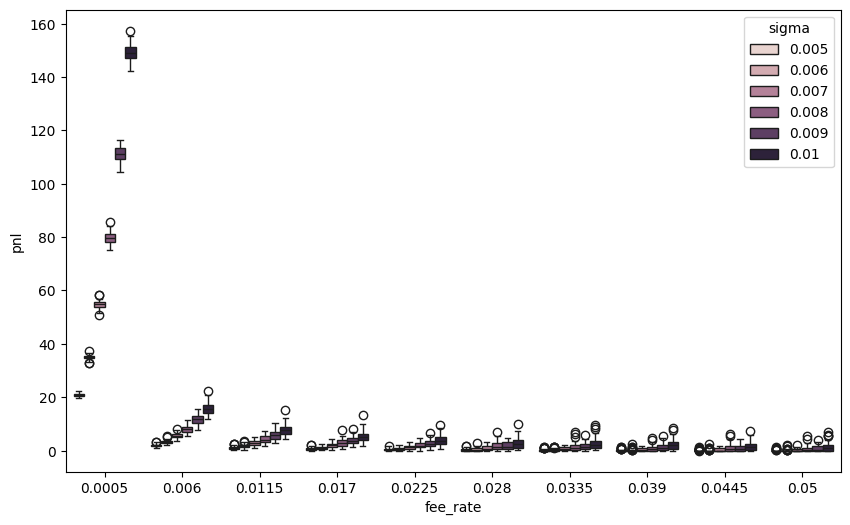

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fee_rate', y='pnl', hue='sigma', data=results)

Text(0.5, 1.0, 'Trading Volume')

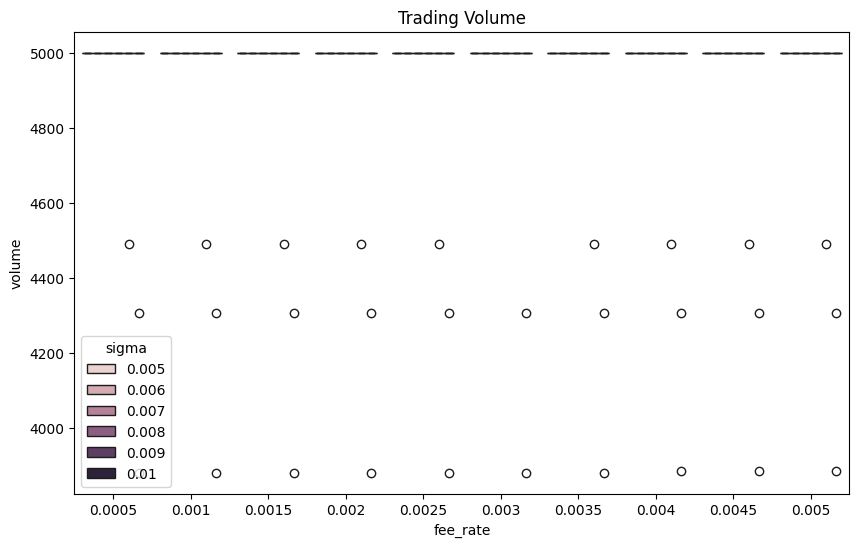

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fee_rate', y='volume', hue='sigma', data=results)
plt.title('Trading Volume')

Text(0.5, 1.0, 'Total Transactions')

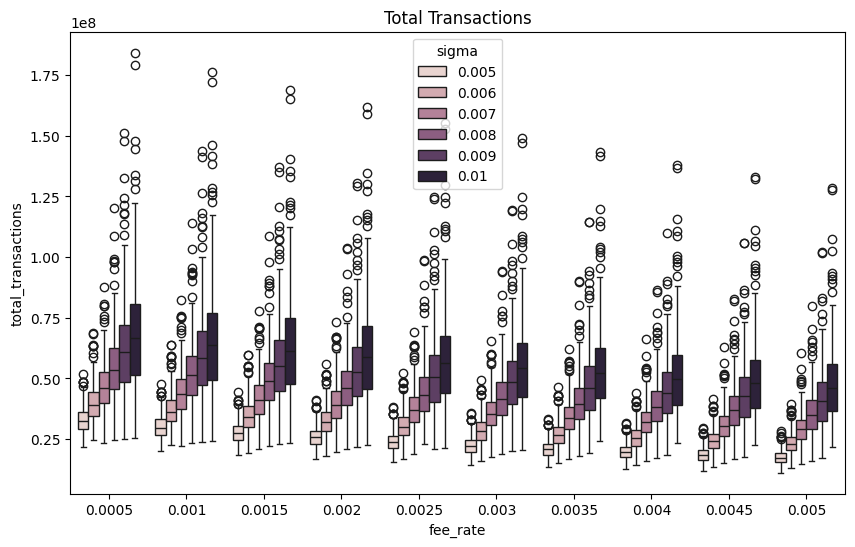

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fee_rate', y='total_transactions', hue='sigma', data=results)
plt.title('Total Transactions')

unique_sigma: [0.005 0.006 0.007 0.008 0.009 0.01 ] | fee_bins: [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005]


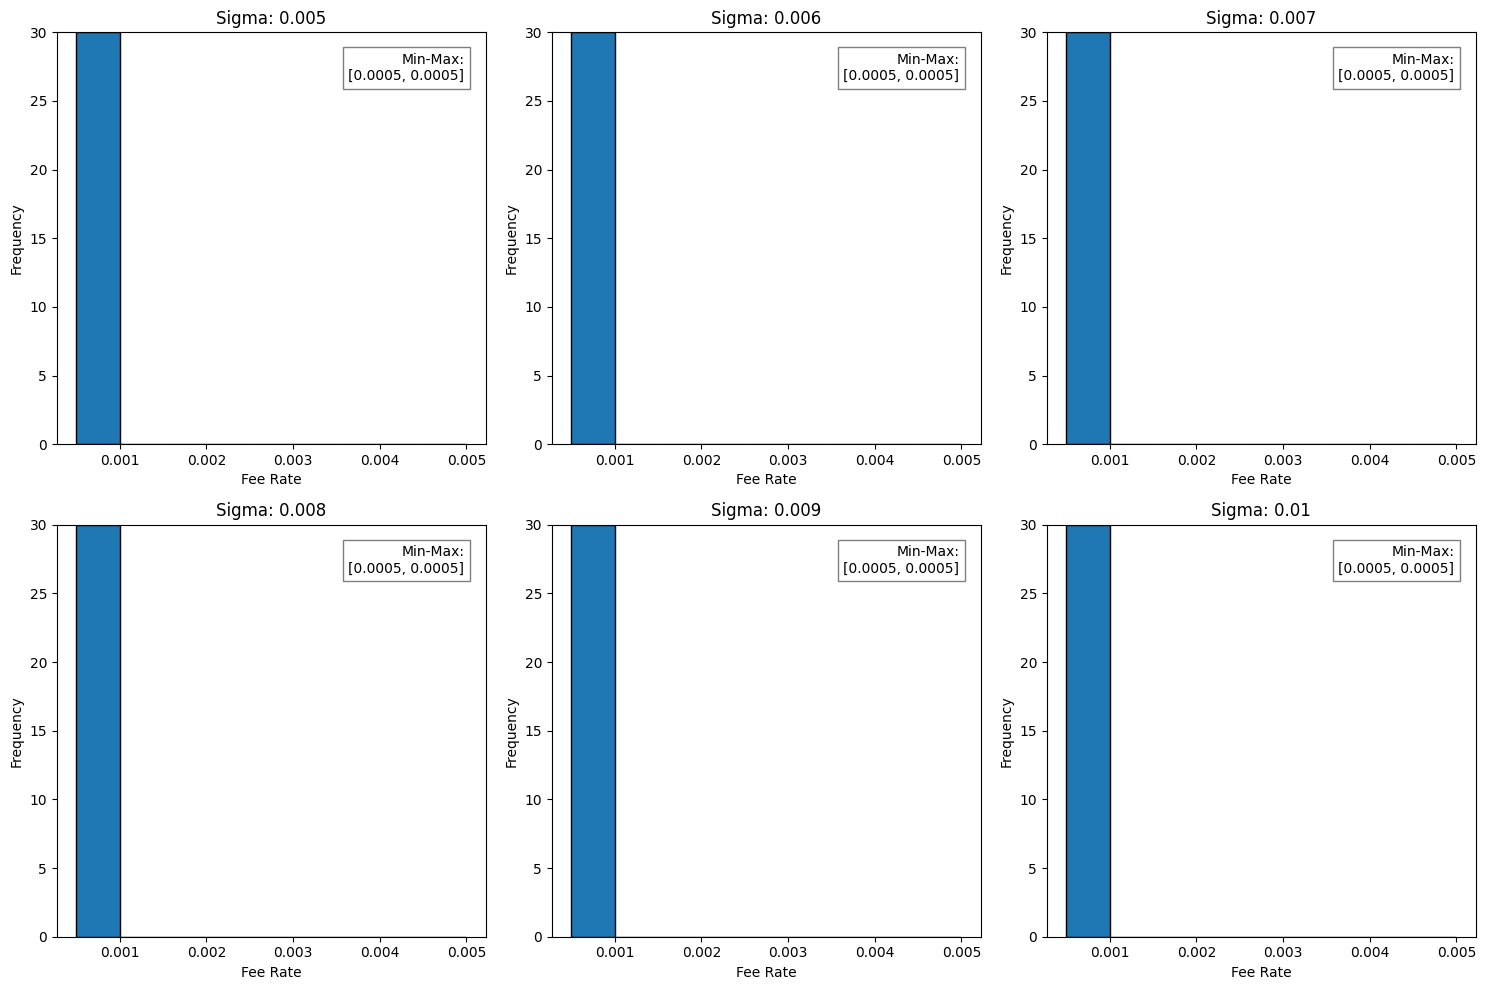

In [8]:
import matplotlib.pyplot as plt

# Get unique sigma and fee_rate values
unique_sigma = results.sigma.unique()
unique_fee = results.fee_rate.unique()[:-1]  # Adjust this slice as needed

# Convert unique_fee to numeric values
fee_bins = sorted([float(fee) for fee in unique_fee])

# Print unique values for reference
print(f"unique_sigma: {unique_sigma} | fee_bins: {fee_bins}")

# Create subplots (2 rows and 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed

# Loop through each unique sigma value
for idx, sigma in enumerate(unique_sigma):
    # Calculate row and column for the subplot
    row = idx // 3
    col = idx % 3
    
    # Filter the DataFrame for the current sigma and 'rl' fee_rate
    df = results[(results['sigma'] == sigma) & (results['fee_rate'] == 'rl')]

    # Plot the histogram using fee_bins as bin edges
    ax[row, col].hist(df['dynamic_fee'], bins=fee_bins, edgecolor='black')
    
    # Calculate min and max bounds
    min_bound = df['dynamic_fee'].min()
    max_bound = df['dynamic_fee'].max()
    
    # Set the title for sigma only
    ax[row, col].set_title(f'Sigma: {sigma}')
    
    # Annotate the plot with the min and max bounds
    ax[row, col].text(0.95, 0.95, f'Min-Max:\n[{min_bound:.4f}, {max_bound:.4f}]',
                      verticalalignment='top', horizontalalignment='right',
                      transform=ax[row, col].transAxes, fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.5))
    
    # Set labels and limits
    ax[row, col].set_xlabel('Fee Rate')
    ax[row, col].set_ylabel('Frequency')
    ax[row, col].set_ylim(0, 30)  # Adjust the y-axis limit as needed

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

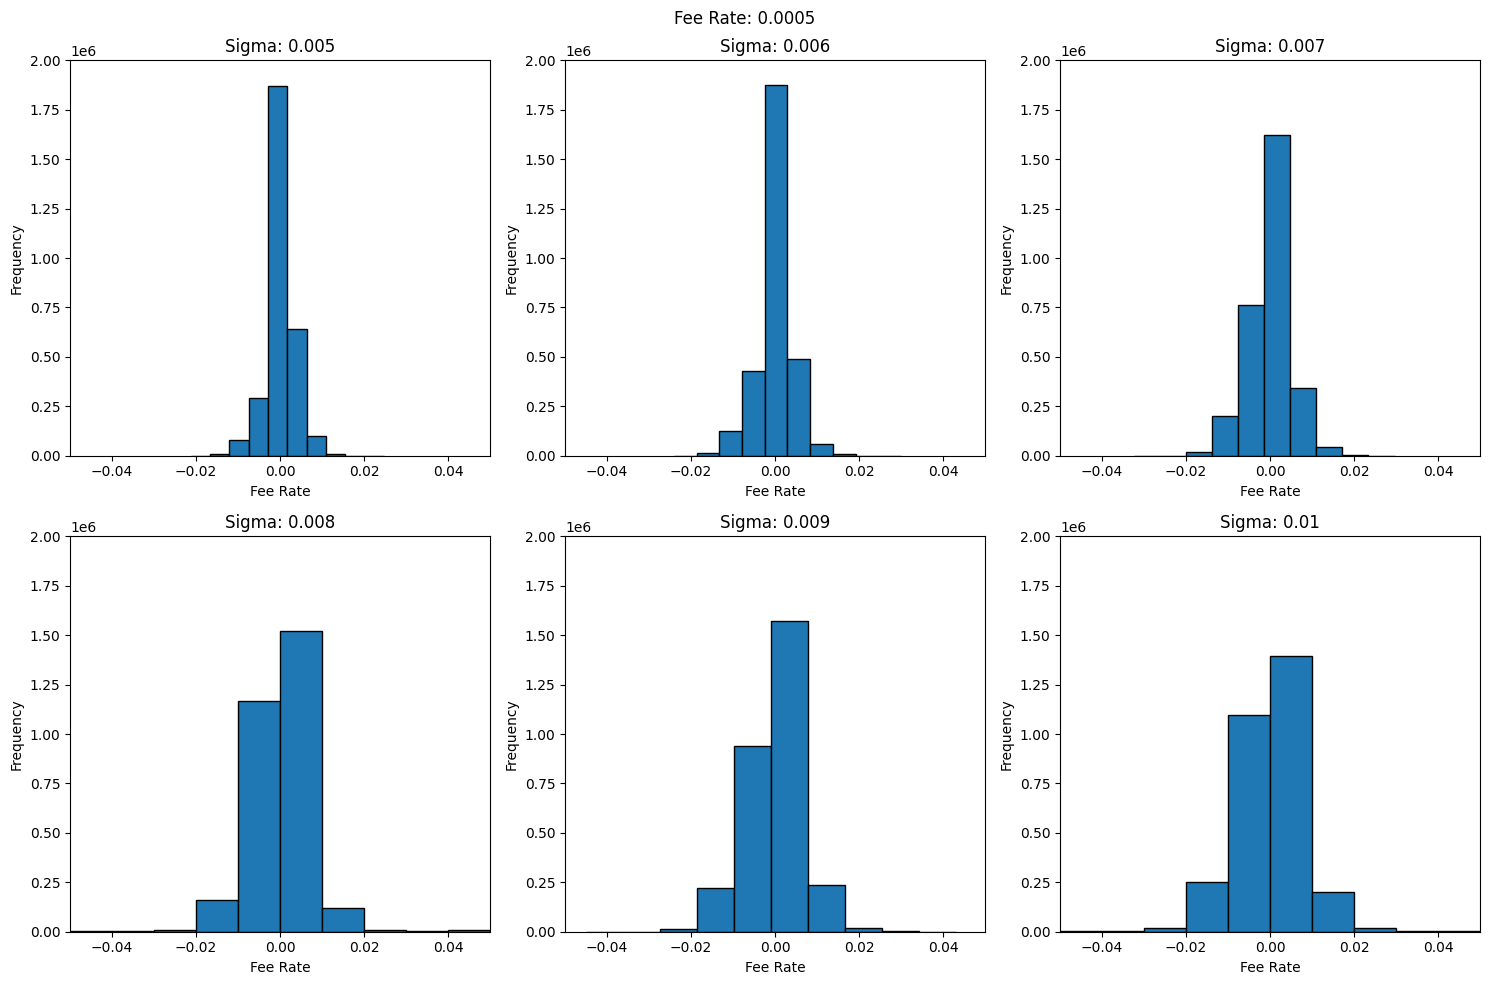

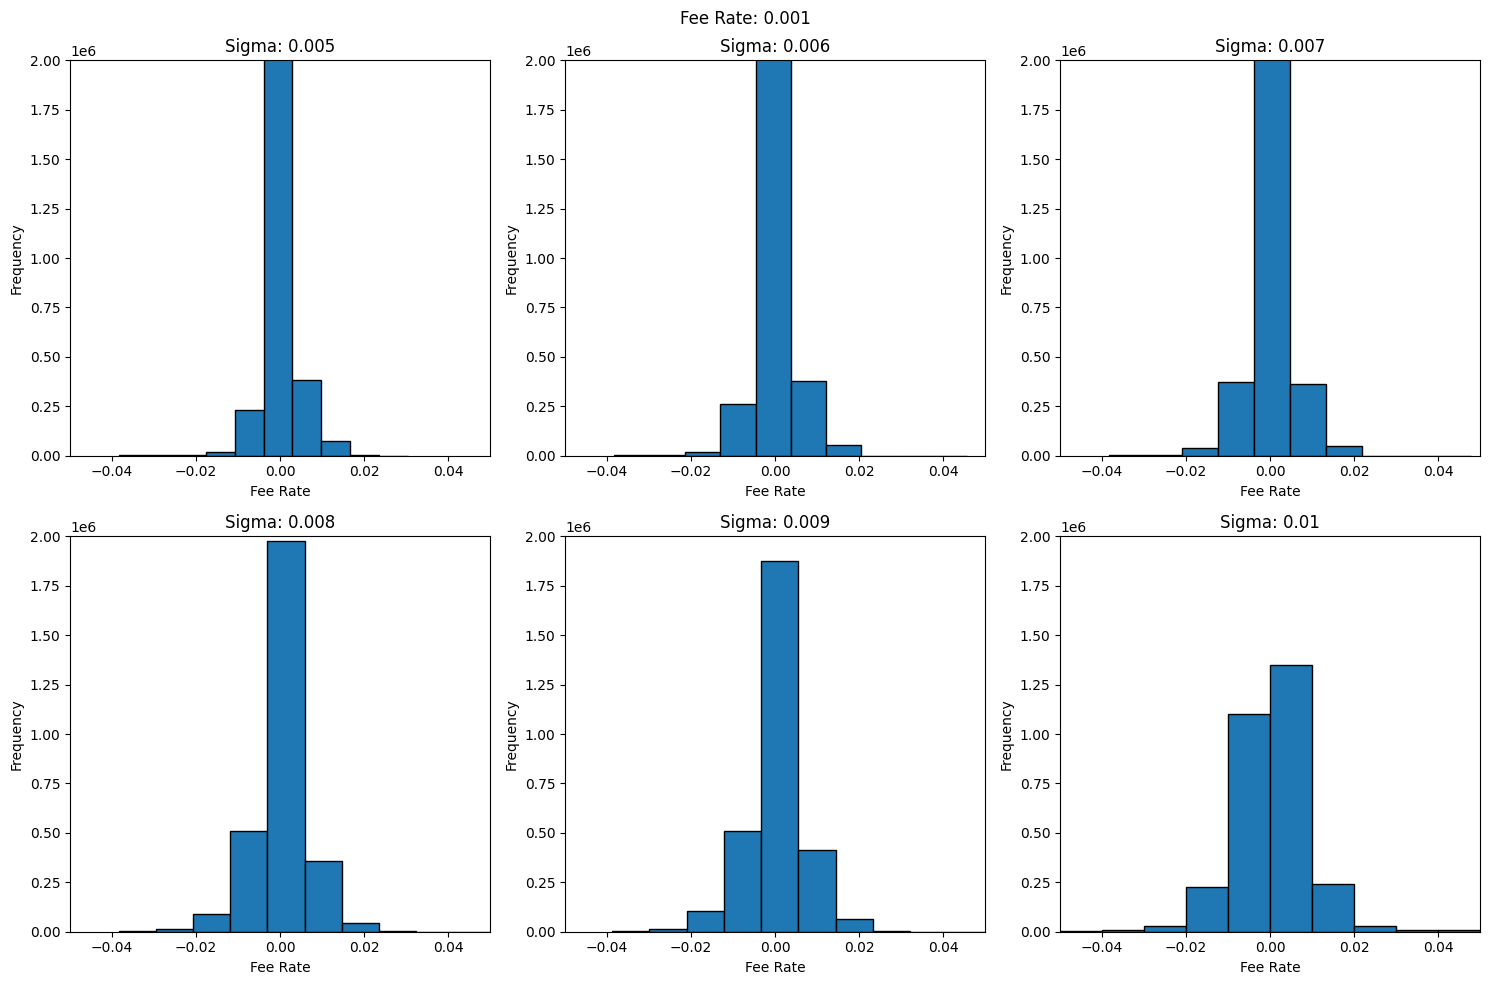

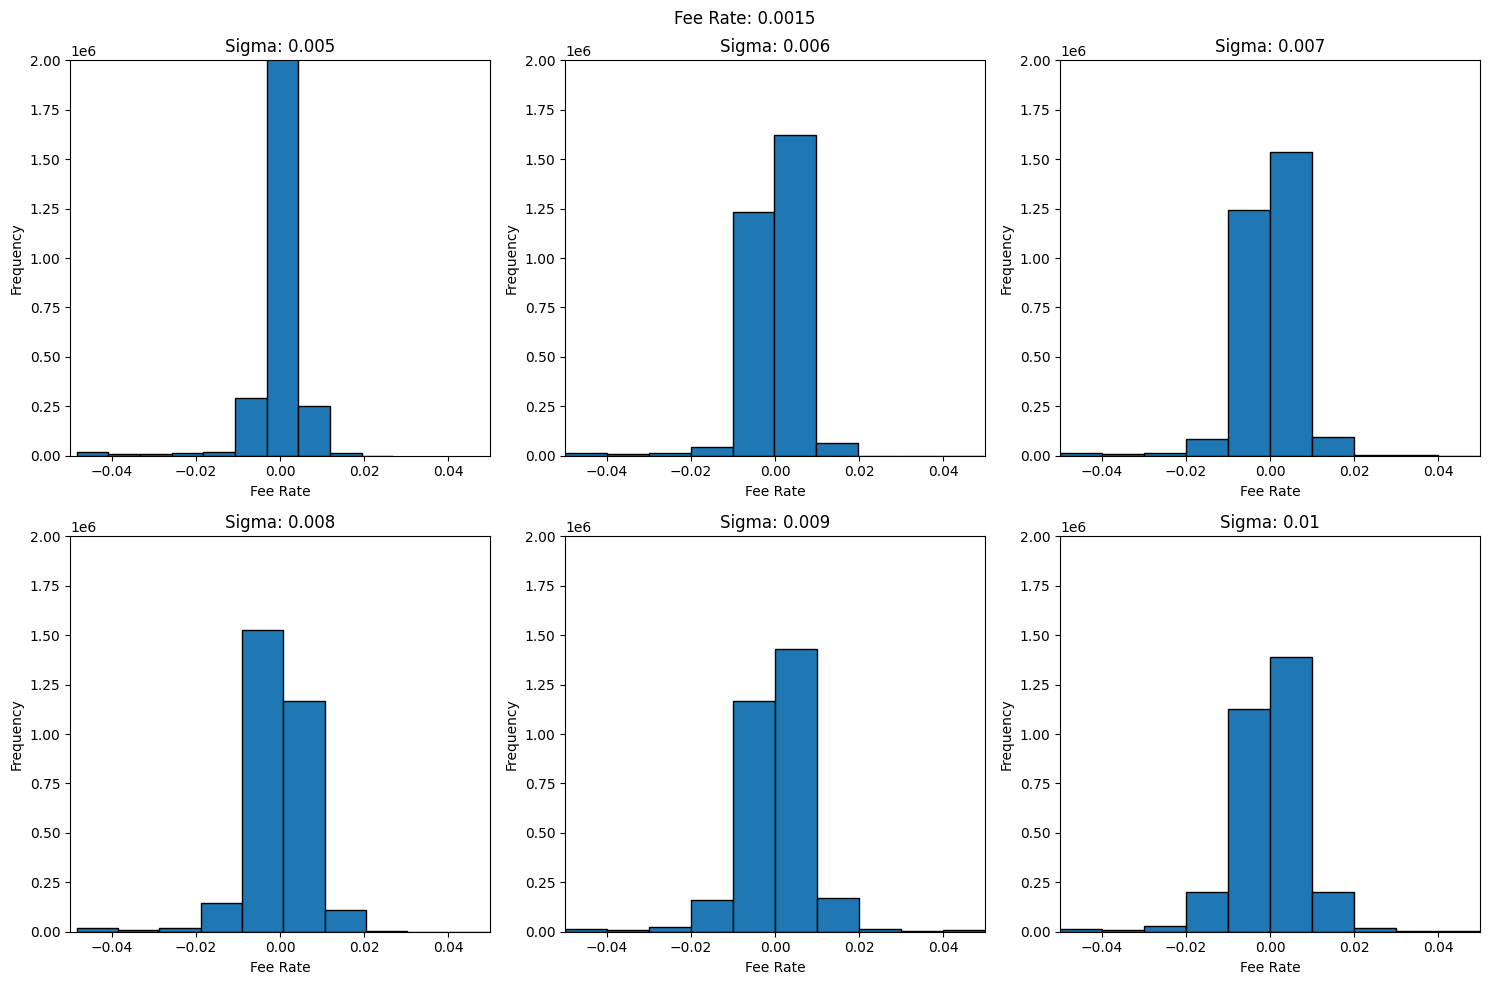

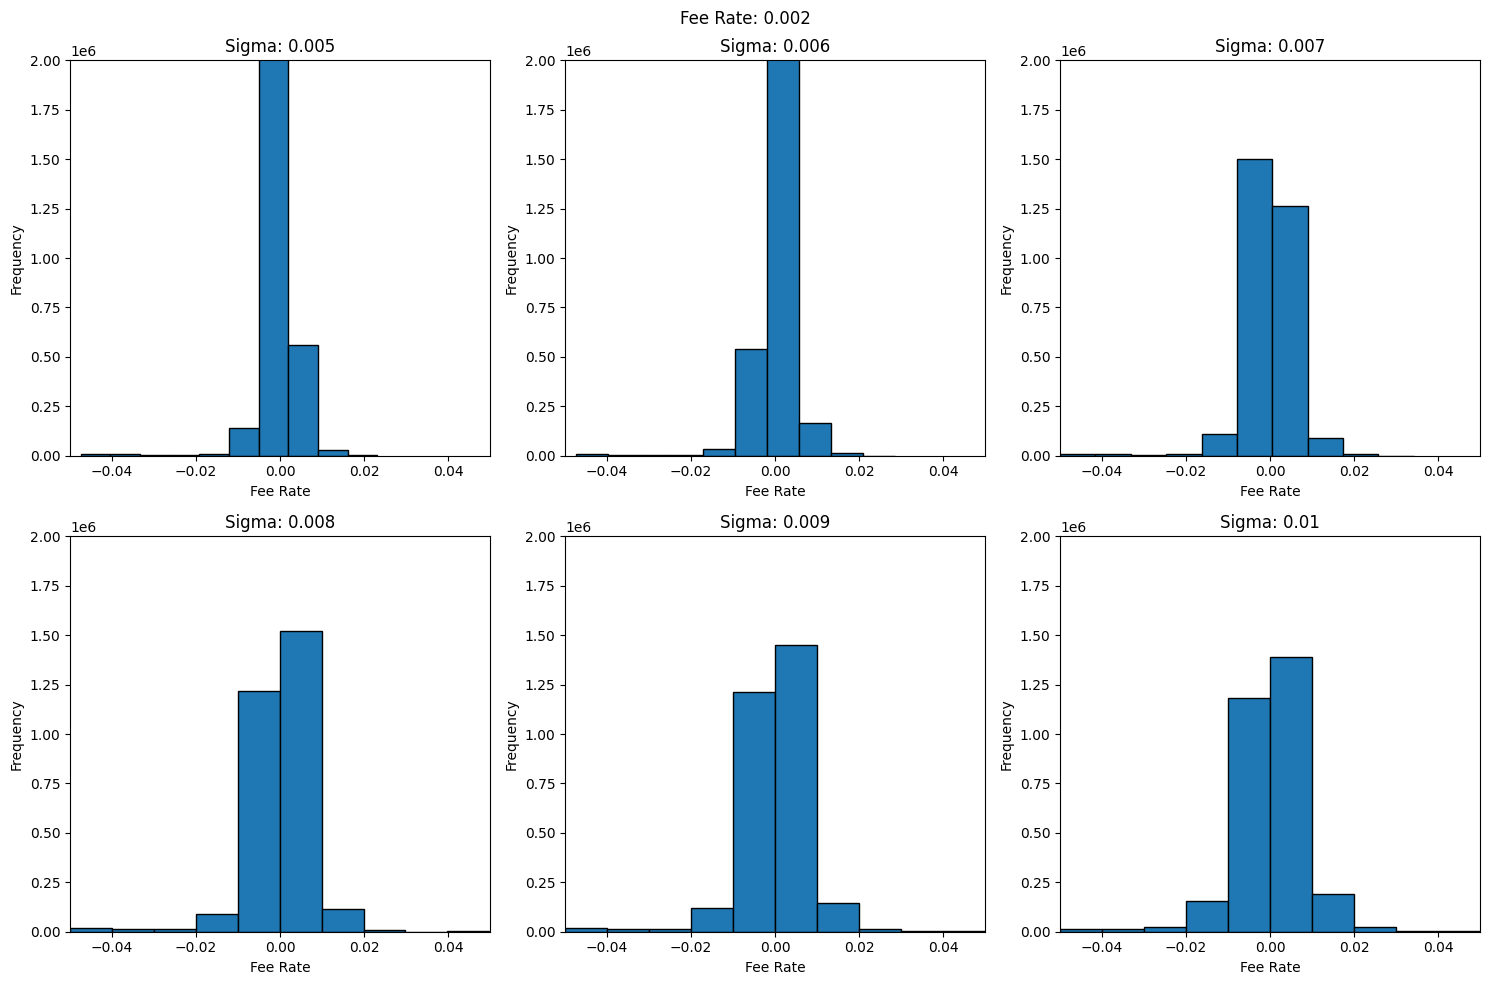

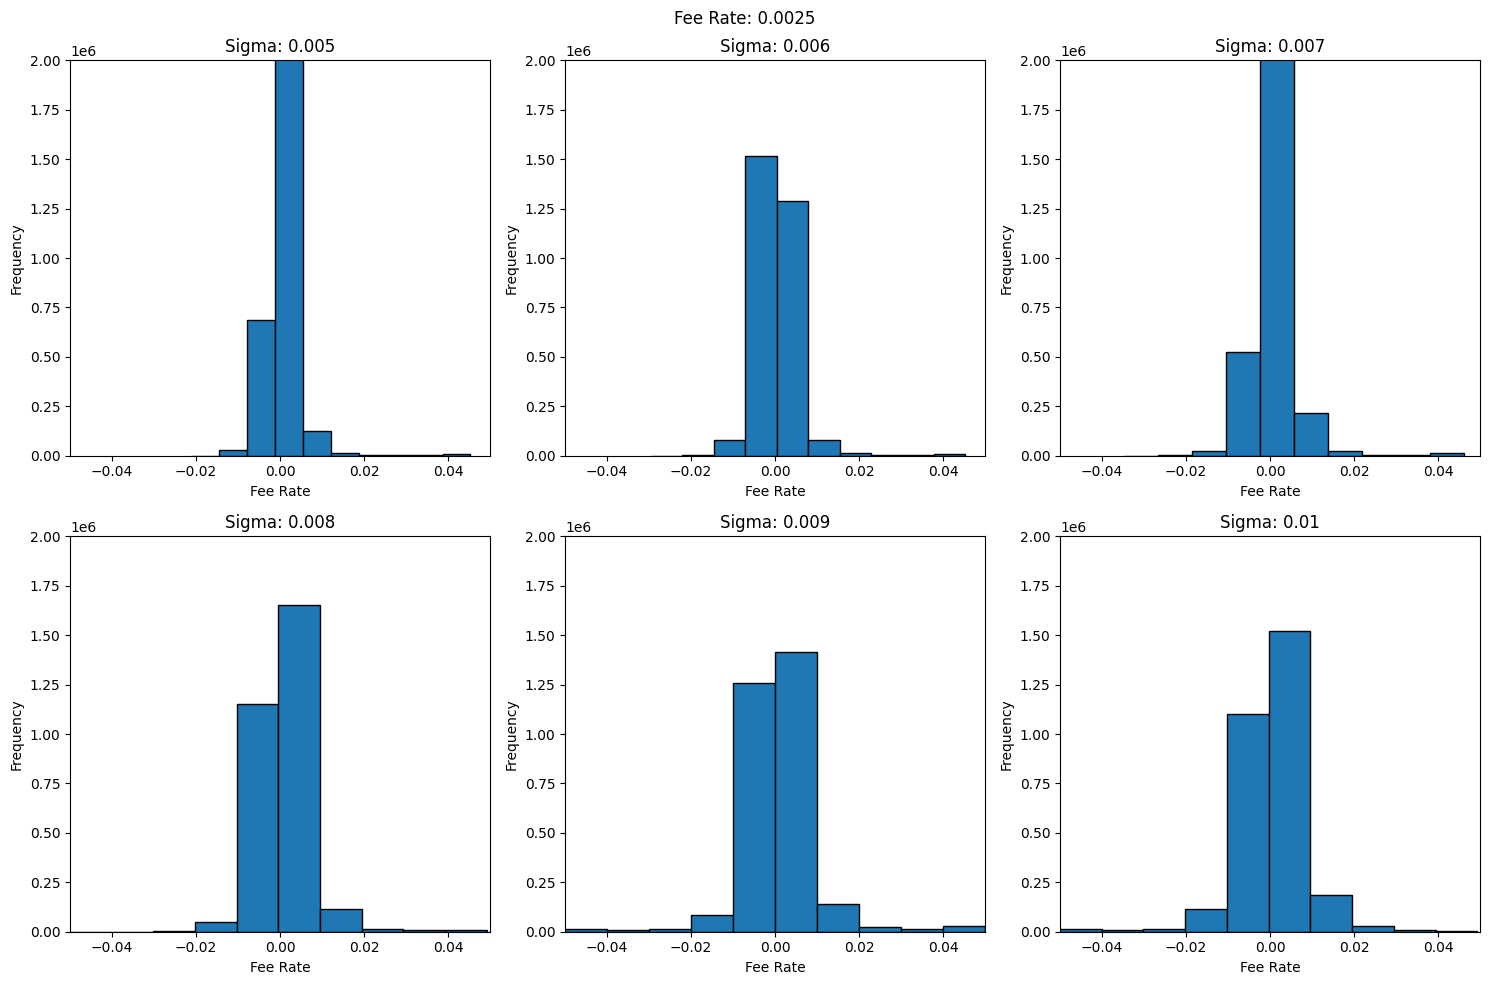

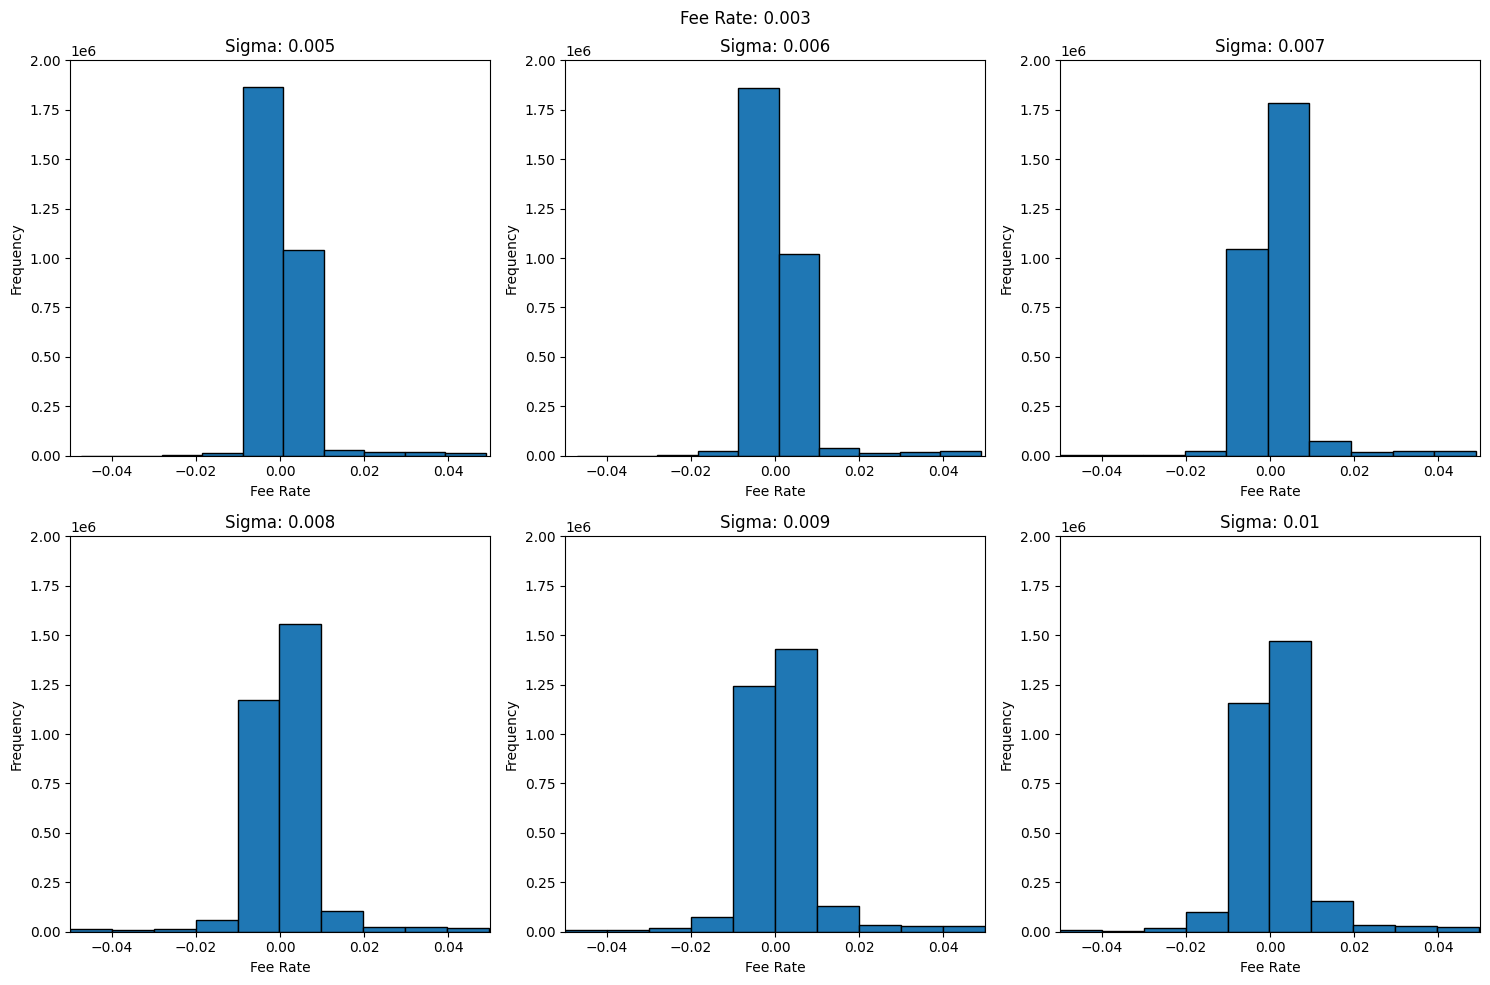

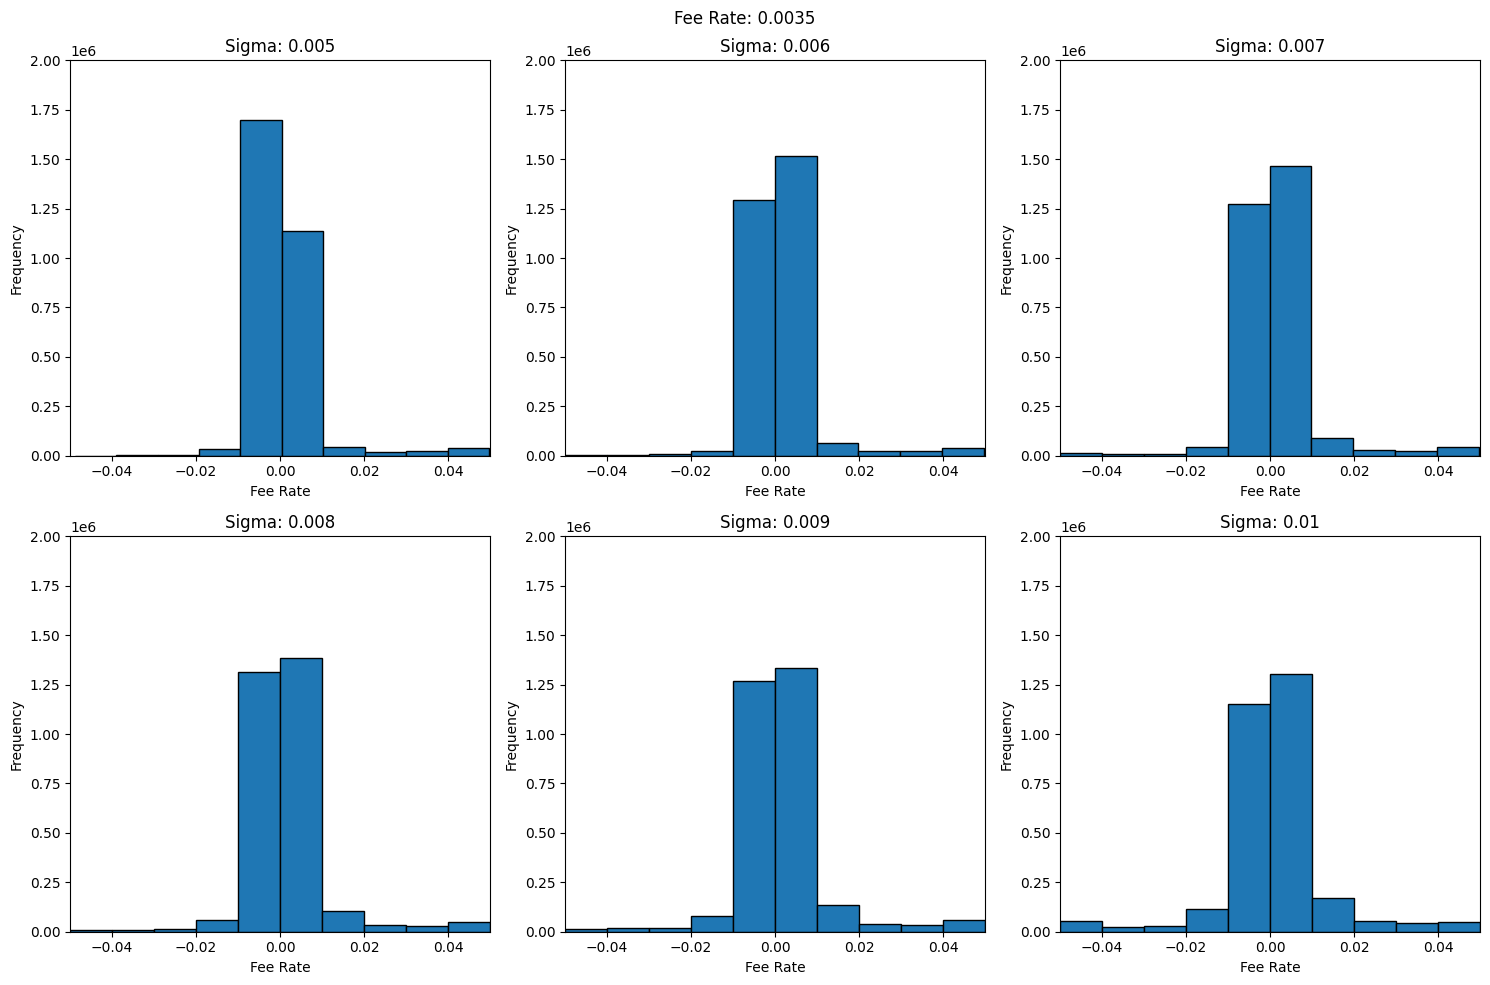

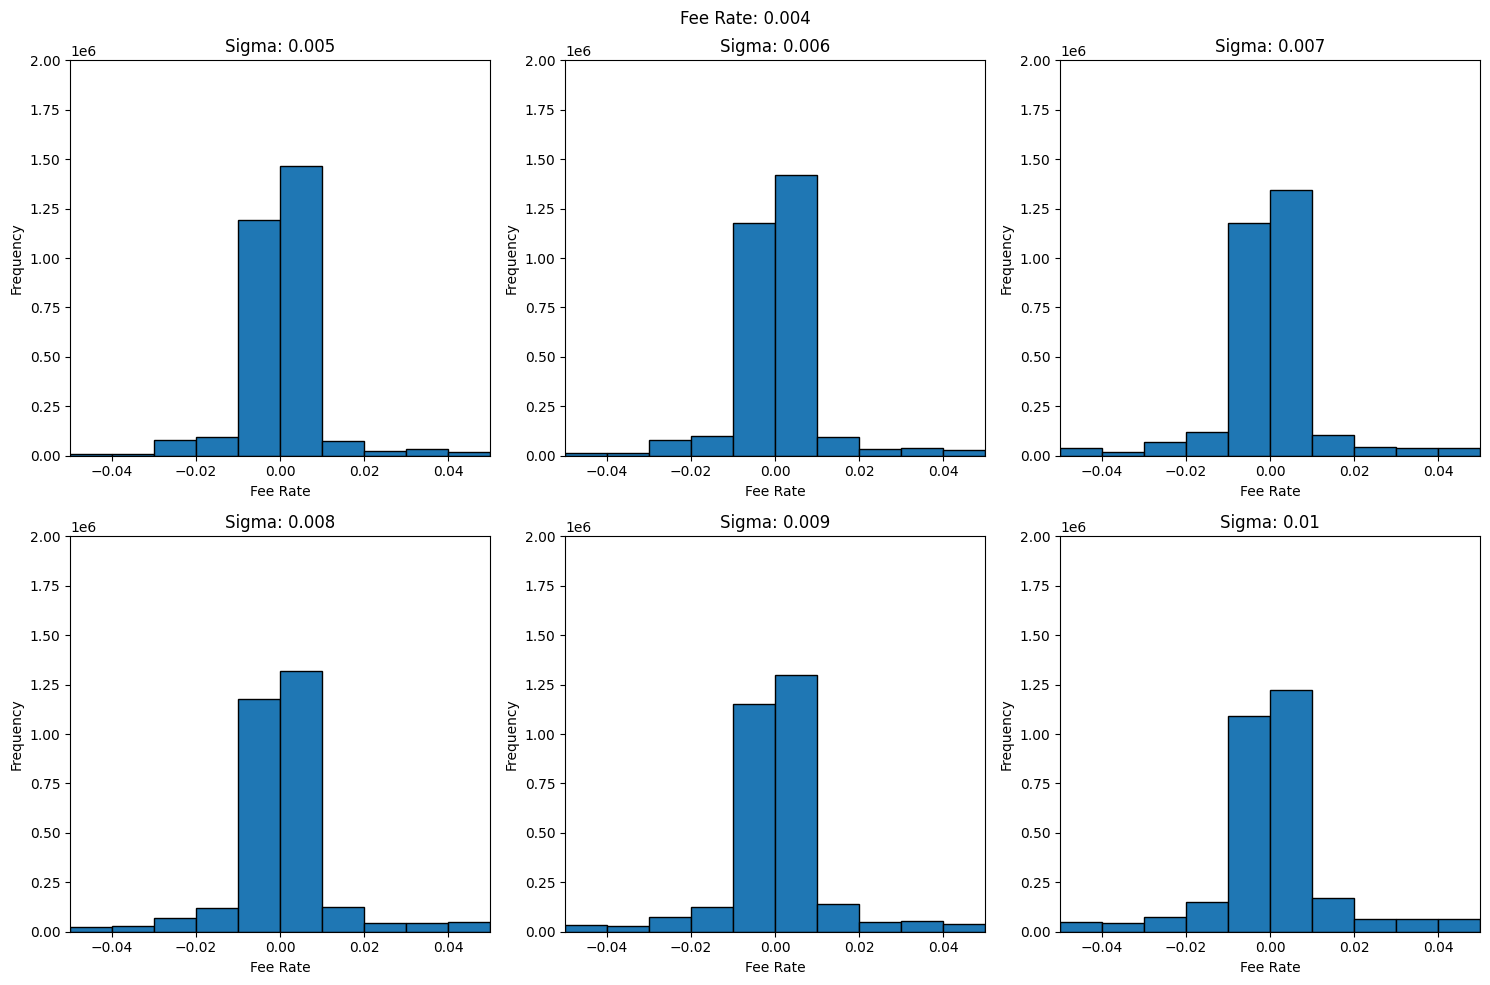

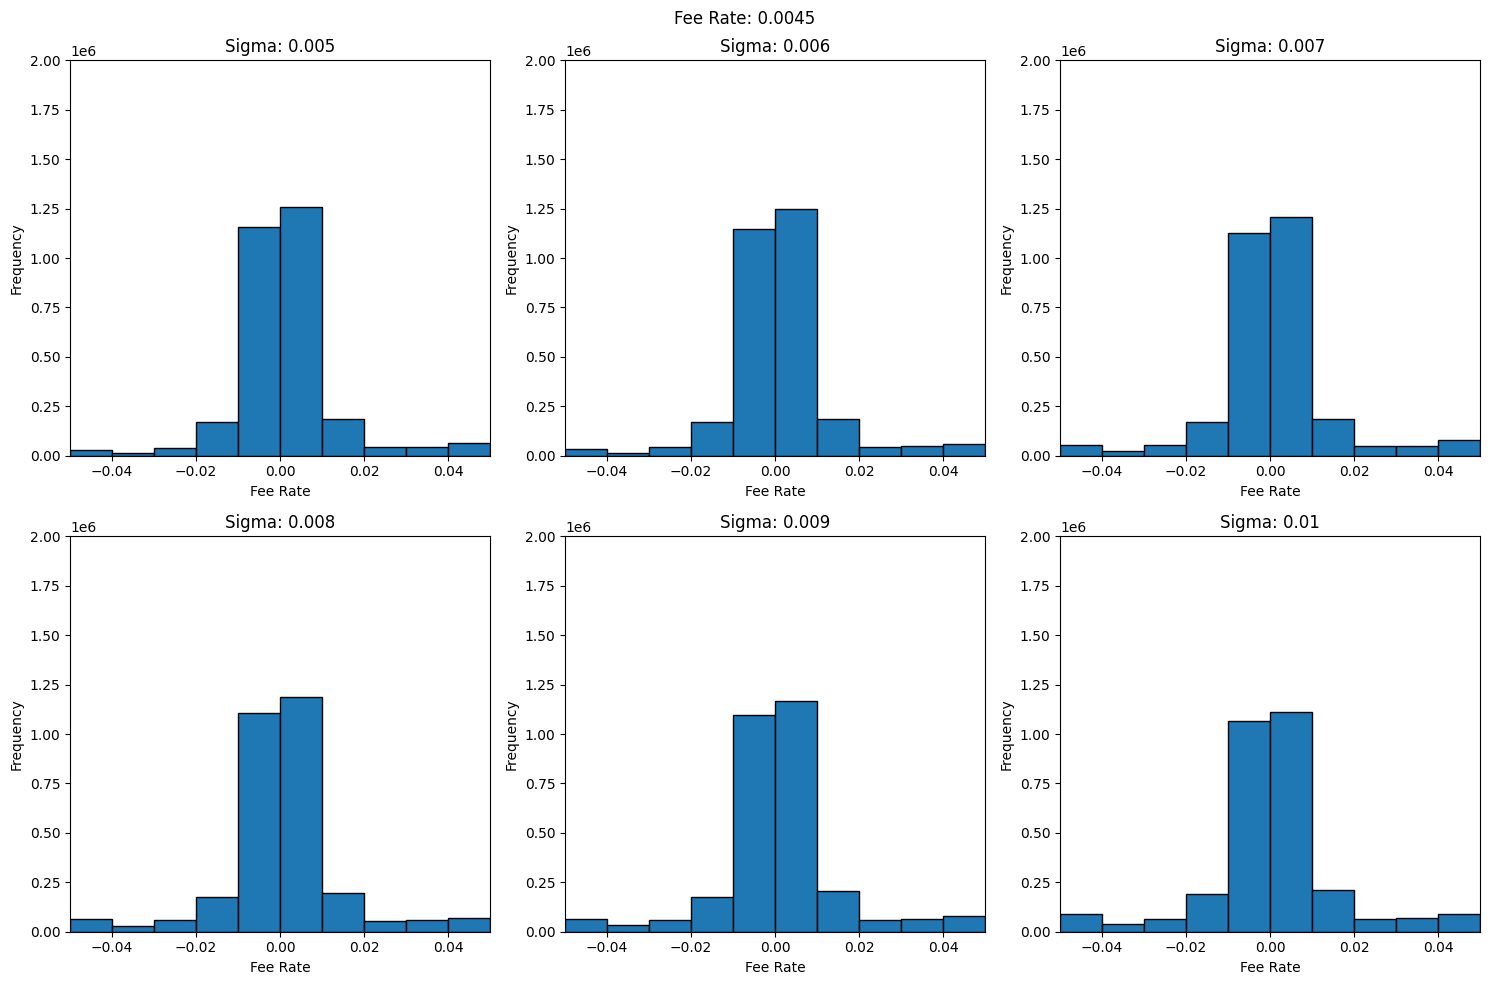

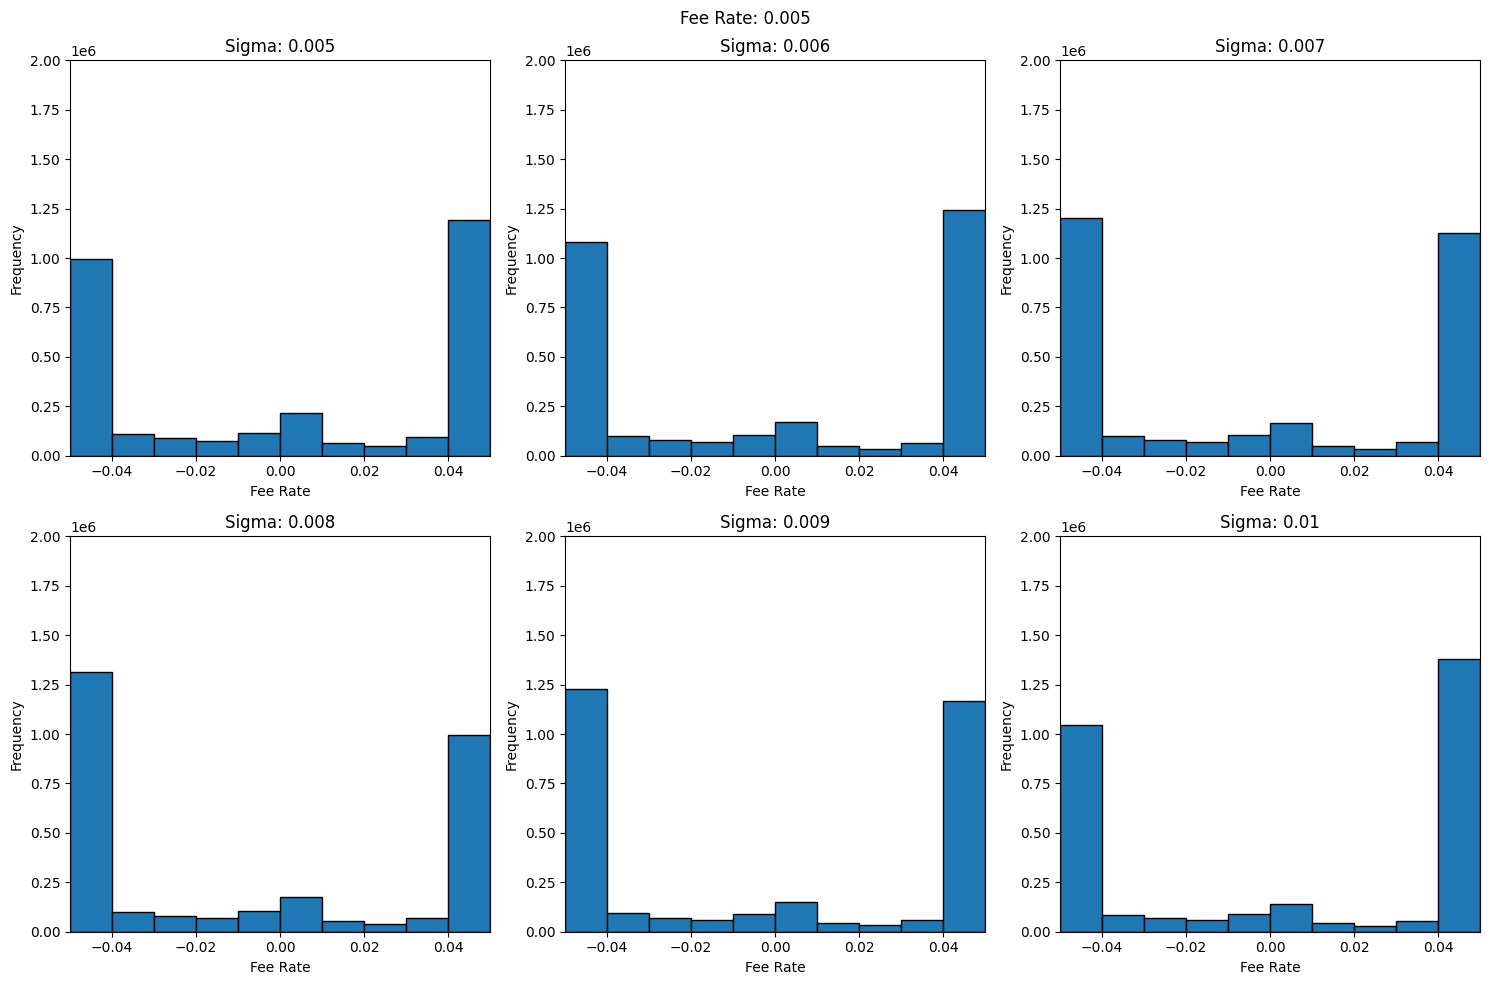

In [43]:
import os
for fee_rate_set in unique_fee:
    # import trader transations for each sigma for fee rate of 0.0005
    root_dir = '/home/shiftpub/AMM-Python/exp/final_results/intermediate_results_20240916_005754'
    all_trader_df = pd.DataFrame()
    for sigma in unique_sigma:
        trader_df_folder = f'{root_dir}/sigma_{sigma}/fee_{fee_rate_set}'
        # load the csv file in the folder beginning with 'trader_transactions'
        files = [f for f in os.listdir(trader_df_folder) if f.startswith('trader_transactions')]
        for file in files:
            trader_df = pd.read_csv(f'{trader_df_folder}/{file}')
            trader_df['sigma'] = sigma
            # concatenate the dataframes
            all_trader_df = pd.concat([all_trader_df, trader_df])
            # print(f"load {file}")
            
    # Create subplots (2 rows and 3 columns)
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed

    # Loop through each unique sigma value
    for idx, sigma in enumerate(unique_sigma):
        # Calculate row and column for the subplot
        row = idx // 3
        col = idx % 3
        
        # Filter the DataFrame for the current sigma and 'rl' fee_rate
        df = all_trader_df[(all_trader_df['sigma'] == sigma)]

        # Plot the histogram using fee_bins as bin edges
        ax[row, col].hist(df['trader_swap_rate'], bins=10, edgecolor='black')
        ax[row, col].set_title(f'Sigma: {sigma}')
        ax[row, col].set_xlabel('Fee Rate')
        ax[row, col].set_ylabel('Frequency')
        # fix x aixs and y axis range
        ax[row, col].set_ylim(0, 2*int(1e6))
        ax[row, col].set_xlim(-0.05, 0.05)

    # Adjust layout to prevent overlapping
    plt.suptitle(f'Fee Rate: {fee_rate_set}')
    plt.tight_layout()
    plt.show()

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


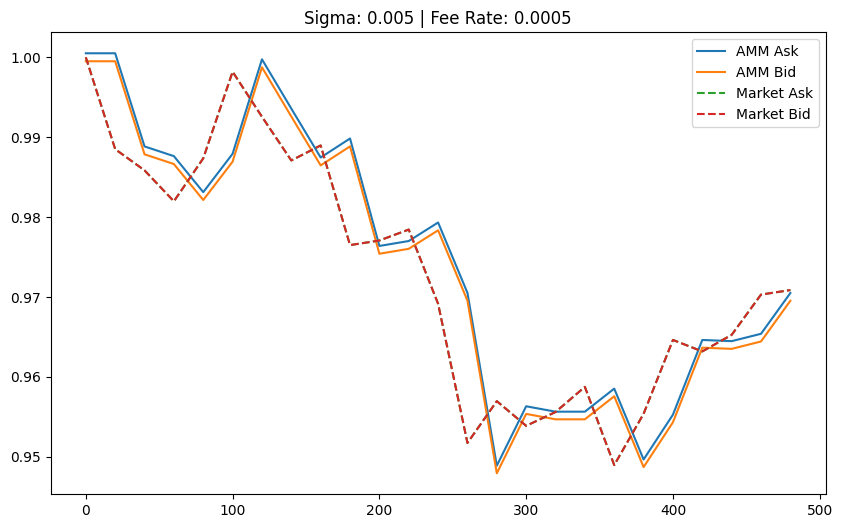

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


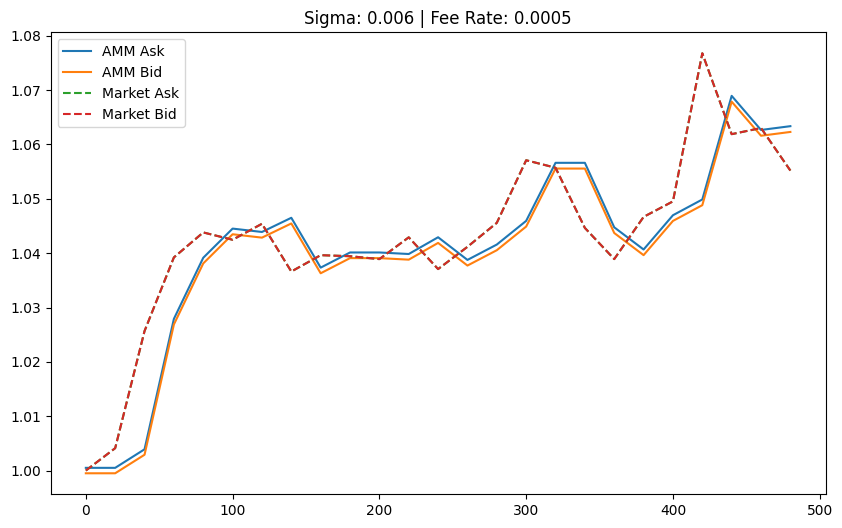

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


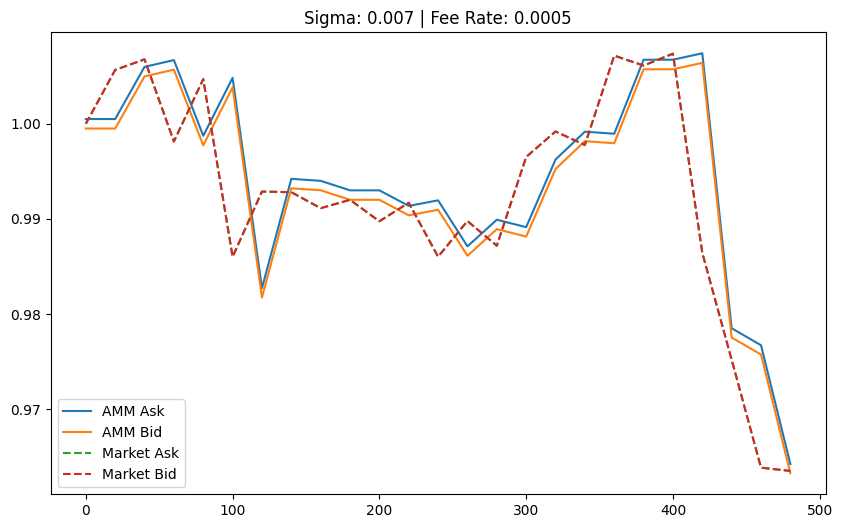

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


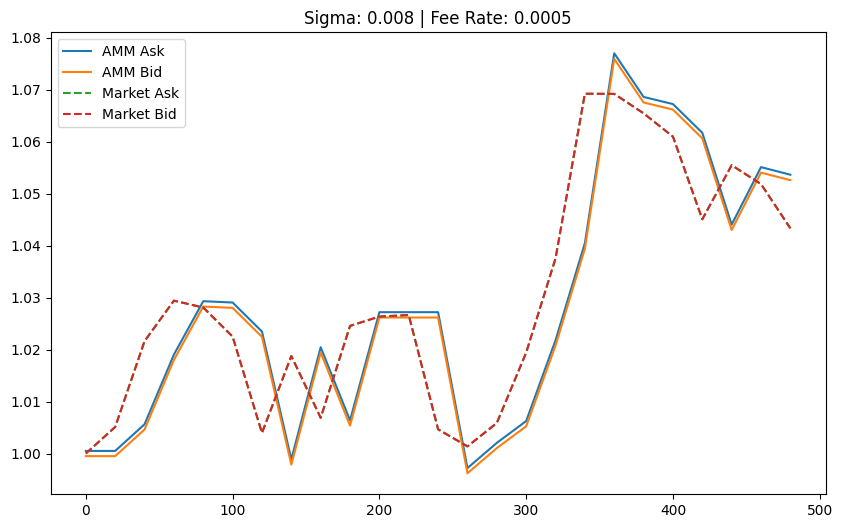

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


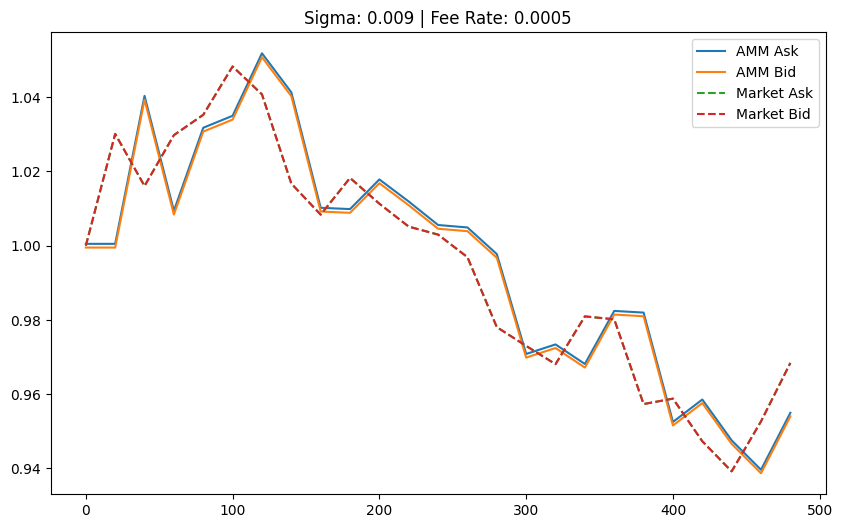

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


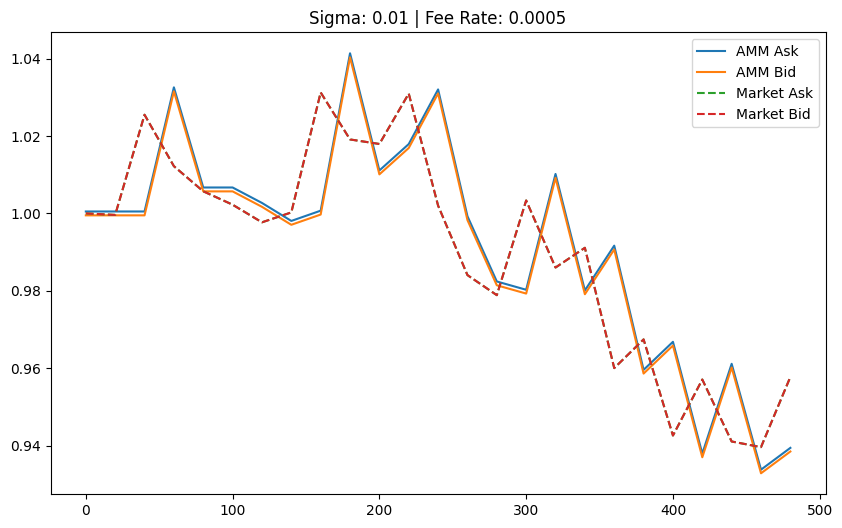

In [71]:
import pandas as pd
import glob

# Define the file pattern using *
for sigma in unique_sigma:
    fee_rate = 0.0005
    file_pattern = f'/home/shiftpub/AMM-Python/exp/final_results/intermediate_results_20240916_005754/sigma_{sigma}/fee_{fee_rate}/trader_transactions_sigma_{sigma}_fee_{fee_rate}_*.csv'

    # Use glob to find the file matching the pattern
    file_list = glob.glob(file_pattern)

    # Load the first matching file into a DataFrame
    if file_list:
        path_df = pd.read_csv(file_list[0])  # Assuming you want the first match
        print(path_df.head())
    else:
        print("No files matched the pattern.")
        
    plt.figure(figsize=(10, 6))
    plt.plot(path_df.iloc[:500:20]['amm_ask'])
    plt.plot(path_df.iloc[:500:20]['amm_bid'])
    plt.plot(path_df.iloc[:500:20]['market_ask'], linestyle='--')
    plt.plot(path_df.iloc[:500:20]['market_bid'], linestyle='--')
    plt.legend(['AMM Ask', 'AMM Bid', 'Market Ask', 'Market Bid'])
    plt.title(f'Sigma: {sigma} | Fee Rate: {fee_rate}')
    plt.show()

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime

# Download historical data for S&P 500 (use 'SPY' as a proxy)
ticker = 'SPY'
data = yf.download(ticker, start="2023-10-01", end=datetime.today().strftime('%Y-%m-%d'))

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Drop the NaN value from the first return calculation
data = data.dropna()

# Calculate the mean (drift rate) and standard deviation (volatility) of daily returns
mean_daily_return = data['Daily Return'].mean()
std_daily_return = data['Daily Return'].std()

# daily return
print(f"Mean Daily Return: {mean_daily_return}")
print(f"Std Daily Return: {std_daily_return}")


[*********************100%***********************]  1 of 1 completed

Mean Daily Return: 0.0012640594294636917
Std Daily Return: 0.007856416105203289


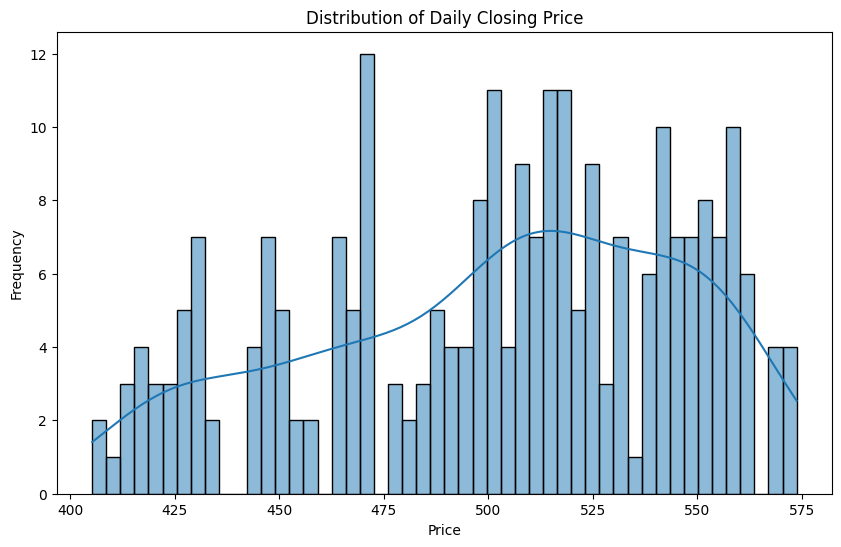

In [2]:
# draw the distribution of daily price 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Adj Close'], bins=50, kde=True)
plt.title('Distribution of Daily Closing Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [3]:
500 * 0.001

0.5